In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Data/price/clean_price_data')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Week Day,Day,Next_High,Next_Low
0,2017-09-11,308.644989,329.451996,307.056000,320.884003,893249984,1,0,324.717987,294.541992
1,2017-10-11,320.670990,324.717987,294.541992,299.252991,885985984,1,2,319.453003,298.191986
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,5,319.153015,298.513000
3,2017-12-11,314.690002,319.153015,298.513000,307.907990,1613479936,1,0,328.415009,307.024994
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,1,0,340.177002,316.763000


In [4]:
df.set_index('Date', inplace=True)
df = df.drop(index=df.index[-1])
df.tail()

,Open,High,Low,Close,Volume,Week Day,Day,Next_High,Next_Low
Date,,,,,,,,,
2023-04-05,1905.168945,1915.871704,1868.629761,1877.704102,6578438233,1,2,1998.413574,1876.946655
2023-05-05,1877.833130,1998.413574,1876.946655,1995.060913,9498261360,1,4,2017.559448,1870.605591
2023-06-05,1995.479126,2017.559448,1870.605591,1900.221802,9623243037,1,0,1933.998413,1873.076416
2023-07-05,1899.917603,1933.998413,1873.076416,1873.076416,6883942236,1,2,1886.162109,1818.450562
2023-08-05,1872.475098,1886.162109,1818.450562,1849.042725,9895102899,0,5,1855.824951,1833.420288


In [5]:
train_size = 0.7
train_index = int(len(df) * train_size)

train_data = df.iloc[:train_index]
test_data = df.iloc[train_index:]

In [6]:
X_train = train_data.drop(['Next_High', 'Next_Low'], axis=1)
y_train = train_data['Next_High']

X_test = test_data.drop(['Next_High', 'Next_Low'], axis=1)
y_test = test_data['Next_High']

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import ElasticNet

In [10]:
linear_model = ElasticNet()

In [11]:
linear_model.fit(X_train_scaled, y_train)

ElasticNet()

In [12]:
linear_pred = linear_model.predict(X_test_scaled)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, linear_pred))
RMSE

106.5580869555413

RMSE of RandomForest was: 156
RMSE of AdaBoostRegressor was: 146
RMSE of GradientBoostingRegressor was: 137

In [15]:
(mean_absolute_error(y_test, linear_pred)/y_train.mean())*100

10.381443335650133

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'alpha':[0.25, 0.5, 0.6, 0.75], 'l1_ratio':[0.5, 0.6, 0.75]}

In [18]:
grid = GridSearchCV(linear_model, param_grid=param_grid, cv=5)

In [19]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.25, 0.5, 0.6, 0.75],
                         'l1_ratio': [0.5, 0.6, 0.75]})

In [20]:
grid.best_params_

{'alpha': 0.25, 'l1_ratio': 0.75}

In [21]:
best_linear = ElasticNet(alpha=0.25, l1_ratio=0.75)

In [22]:
best_linear.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.25, l1_ratio=0.75)

In [23]:
best_pred = best_linear.predict(X_test_scaled)

In [24]:
RMSE = np.sqrt(mean_squared_error(y_test, best_pred))
RMSE

74.50322942237855

In [25]:
best_linear = ElasticNet(alpha=0.25, l1_ratio=0.75)

In [26]:
best_linear.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.25, l1_ratio=0.75)

In [27]:
best_pred = best_linear.predict(X_test_scaled)

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, best_pred))
RMSE

74.50322942237855

In [29]:
import joblib

In [30]:
joblib.dump(value=best_linear, filename='models/linear_model.pkl')

['models/linear_model.pkl']

Second Model

In [33]:
best_linear.score(X_test_scaled, y_test)

0.9949783898063821

In [34]:
import matplotlib.pyplot as plt

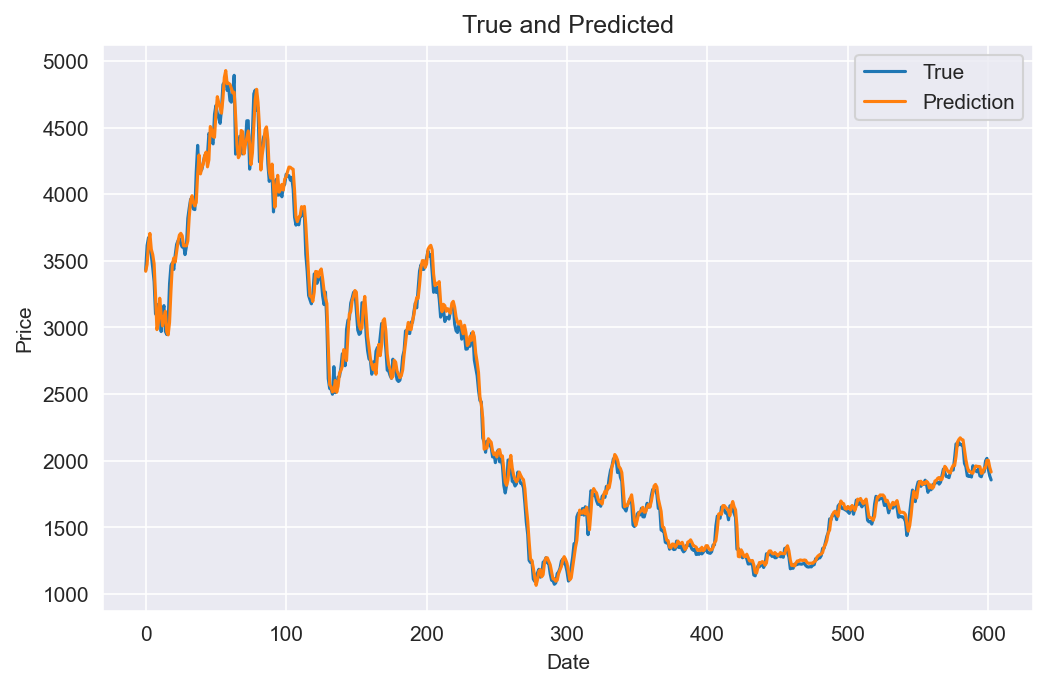

In [35]:
new = pd.DataFrame({'True': y_test, 'Prediction':best_pred})
new['Date'] = np.arange(len(new))

plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()

In [36]:
new

,True,Prediction,Date
Date,,,
2021-09-13,3429.169678,3421.422229,0
2021-09-14,3615.282715,3472.273091,1
2021-09-15,3673.310791,3628.316494,2
2021-09-16,3589.305176,3705.355197,3
2021-09-17,3540.807617,3585.911265,4
...,...,...,...
2023-04-05,1998.413574,1946.971908,598
2023-05-05,2017.559448,2002.107189,599
2023-06-05,1933.998413,2003.459063,600
